# `Lending Club Case Study `


### This project is to identify the defaulters and non-defaulters from the given data-set. Then it has to be analyzed in various aspects in relation with different properties of the dataset.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
from matplotlib import style
from datetime import datetime
import seaborn as sns

In [1]:
print("Hello ,", Name     )

Enter your name : Ramasubramanian B
Hello , Ramasubramanian B


In [10]:
loan_data = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)

In [11]:
loan_data.shape

(39717, 111)

In [12]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


Finding Missing values

In [16]:
a = loan_data.isnull().sum()

In [25]:
b = len(loan_data.id)

In [29]:
missing_perc = round((a/b)*100,2)
missing_perc.loc[missing_perc > 0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

When the missing values are more it affects the analysis. As it is not so important let us remove it...

In [32]:
c = list(missing_perc[missing_perc >=50].index)
len(c)

57

There are around 57 columns are missing with the values that needs to be dropped...

In [42]:
loan_data = loan_data.drop(c, axis = 1)
loan_data.shape

KeyError: "['mths_since_last_delinq' 'mths_since_last_record' 'next_pymnt_d'\n 'mths_since_last_major_derog' 'annual_inc_joint' 'dti_joint'\n 'verification_status_joint' 'tot_coll_amt' 'tot_cur_bal' 'open_acc_6m'\n 'open_il_6m' 'open_il_12m' 'open_il_24m' 'mths_since_rcnt_il'\n 'total_bal_il' 'il_util' 'open_rv_12m' 'open_rv_24m' 'max_bal_bc'\n 'all_util' 'total_rev_hi_lim' 'inq_fi' 'total_cu_tl' 'inq_last_12m'\n 'acc_open_past_24mths' 'avg_cur_bal' 'bc_open_to_buy' 'bc_util'\n 'mo_sin_old_il_acct' 'mo_sin_old_rev_tl_op' 'mo_sin_rcnt_rev_tl_op'\n 'mo_sin_rcnt_tl' 'mort_acc' 'mths_since_recent_bc'\n 'mths_since_recent_bc_dlq' 'mths_since_recent_inq'\n 'mths_since_recent_revol_delinq' 'num_accts_ever_120_pd' 'num_actv_bc_tl'\n 'num_actv_rev_tl' 'num_bc_sats' 'num_bc_tl' 'num_il_tl' 'num_op_rev_tl'\n 'num_rev_accts' 'num_rev_tl_bal_gt_0' 'num_sats' 'num_tl_120dpd_2m'\n 'num_tl_30dpd' 'num_tl_90g_dpd_24m' 'num_tl_op_past_12m' 'pct_tl_nvr_dlq'\n 'percent_bc_gt_75' 'tot_hi_cred_lim' 'total_bal_ex_mort' 'total_bc_limit'\n 'total_il_high_credit_limit'] not found in axis"

From 111 columns it is reduced to 54

d'desc' column is not important as we are not working with 'NLP' technology. So we can drop the same...

In [43]:
print(loan_data)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    13

Lets find the unique values of 

In [45]:
print("uemp_title : %d"  % len(loan_data.emp_title.unique()))
print("uemp_length : %d"  % len(loan_data.emp_length.unique()))
print("utitle : %d"  % len(loan_data.title.unique()))
print("urevol_util : %d"  % len(loan_data.revol_util.unique()))
print("utitle : %d"  % len(loan_data.title.unique()))
print("ulast_pymnt_d : %d"  % len(loan_data.last_pymnt_d.unique()))
print("ulast_credit_pull_d : %d"  % len(loan_data.last_credit_pull_d.unique()))
print("ucollections_12_mths_ex_med : %d"  % len(loan_data.collections_12_mths_ex_med.unique()))
print("uchargeoff_within_12_mths : %d"  % len(loan_data.chargeoff_within_12_mths.unique()))
print("upub_rec_bankruptcies : %d"  % len(loan_data.pub_rec_bankruptcies.unique()))
print("utax_liens : %d"  % len(loan_data.tax_liens.unique()))

uemp_title : 28821
uemp_length : 12
utitle : 19616
urevol_util : 1090
utitle : 19616
ulast_pymnt_d : 102
ulast_credit_pull_d : 107
ucollections_12_mths_ex_med : 2
uchargeoff_within_12_mths : 2
upub_rec_bankruptcies : 4
utax_liens : 2


The values available in the columns emp_length, ucollections_12_mths_ex_med, uchargeoff_within_12_mths, upub_rec_bankruptcies,
utax_liens are easy to segregate...

In [46]:
loan_data.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [49]:
loan_data.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [50]:
loan_data.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [51]:
loan_data.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [52]:
loan_data.tax_liens.unique()

array([ 0., nan])

The data in the columns of collections_12_mths_ex_med | chargeoff_within_12_mths | tax_liens are either 0 or nan (empty values) which are not helpful for the analysis!!. So dropping the same.

In [55]:
remove_col_list = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan_data = loan_data.drop(remove_col_list, axis=1)
loan_data.shape

(39717, 50)

**Fully Paid vs Charged-off**

In [57]:
loan_data


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,0.00,0.0000,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,117.08,1.1100,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,0.00,0.0000,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,0.00,0.0000,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,0.00,0.0000,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,0.00,0.0000,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0,0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,0.00,0.0000,May-16,1313.76,May-16,1,INDIVIDUAL,0,0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,0.00,0.0000,Jan-15,111.34,Dec-14,1,INDIVIDUAL,0,0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,189.06,2.0900,Apr-12,152.39,Aug-12,1,INDIVIDUAL,0,0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,269.29,2.5200,Nov-12,121.45,Mar-13,1,INDIVIDUAL,0,0,0.0


In [58]:
loan_data = loan_data[~loan_data.pub_rec_bankruptcies.isnull()]
print(loan_data)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000      4975.000000   
1      1077430    1314167       2500         2500      2500.000000   
2      1077175    1313524       2400         2400      2400.000000   
3      1076863    1277178      10000        10000     10000.000000   
4      1075358    1311748       3000         3000      3000.000000   
5      1075269    1311441       5000         5000      5000.000000   
6      1069639    1304742       7000         7000      7000.000000   
7      1072053    1288686       3000         3000      3000.000000   
8      1071795    1306957       5600         5600      5600.000000   
9      1071570    1306721       5375         5375      5350.000000   
10     1070078    1305201       6500         6500      6500.000000   
11     1069908    1305008      12000        12000     12000.000000   
12     1064687    1298717       9000         9000      9000.000000   
13     1069866    13

There would be further missing values in the remaining columns...Let us look for that...

In [59]:
loan_data_filtered = round((loan_data.isnull().sum()/len(loan_data.id))*100,2)
print(loan_data_filtered)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.75
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
pymnt_plan                 0.00
url                        0.00
purpose                    0.00
title                      0.03
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_ac

In [67]:
loan_data_filtered[loan_data_filtered != 0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

There are further missing values available in the columns of emp_title, emp_length...

In [70]:
loan_data = loan_data[~loan_data.emp_title.isnull()]
loan_data = loan_data[~loan_data.emp_length.isnull()]
loan_data.shape

(36493, 50)

In [71]:
loan_data_filtered = round((loan_data.isnull().sum()/len(loan_data.id))*100,2)
print(loan_data_filtered)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  0.00
emp_length                 0.00
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
pymnt_plan                 0.00
url                        0.00
purpose                    0.00
title                      0.00
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.00
total_ac

In [72]:
loan_data_filtered[loan_data_filtered != 0]

last_pymnt_d    0.16
dtype: float64

In [74]:
loan_data = loan_data[~loan_data.last_pymnt_d.isnull()]
loan_data.shape

(36433, 50)

In [75]:
loan_data.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

In [76]:
columns_no_use = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt']
loan_data = loan_data.drop(columns_no_use, axis=1)
loan_data.shape

(36433, 38)

In [77]:
loan_data = loan_data.drop_duplicates()
print(loan_data)

       loan_amnt        term int_rate  installment grade sub_grade  \
1           2500   60 months   15.27%        59.83     C        C4   
3          10000   36 months   13.49%       339.31     C        C1   
4           3000   60 months   12.69%        67.79     B        B5   
5           5000   36 months    7.90%       156.46     A        A4   
6           7000   60 months   15.96%       170.08     C        C5   
7           3000   36 months   18.64%       109.43     E        E1   
9           5375   60 months   12.69%       121.45     B        B5   
10          6500   60 months   14.65%       153.45     C        C3   
11         12000   36 months   12.69%       402.54     B        B5   
12          9000   36 months   13.49%       305.38     C        C1   
13          3000   36 months    9.91%        96.68     B        B1   
14         10000   36 months   10.65%       325.74     B        B2   
15          1000   36 months   16.29%        35.31     D        D1   
16         10000   3

In [78]:
loan_data.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [83]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [84]:
loan_data = loan_data.replace({"emp_length": emp_length_dict })

In [85]:
loan_data.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

The 'term' is given in number + 'string' format. So we need to remove the 'string' for analysis purpose.

In [86]:
loan_data.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

In [87]:
loan_data['term'] = loan_data.term.apply(lambda x: x.split()[0])
loan_data.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

The term started with the **earliest_cr_line** and the value is available in 'month' + 'year' format. So we need to split it 'month' and 'year' for analysis.

# Analysis

In [116]:
loan_data.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

Current cannot be considered for analysis , as it is on-going loan!!. We need to consider the Fully paid and charged off for analysis.

In [119]:
loan_data = loan_data[loan_data['loan_status'].isin(['Fully Paid','Charged Off'])]
loan_data.shape

(35367, 40)

In [120]:
print(loan_data)

       loan_amnt term int_rate  installment grade sub_grade  \
1           2500   60   15.27%        59.83     C        C4   
3          10000   36   13.49%       339.31     C        C1   
5           5000   36    7.90%       156.46     A        A4   
6           7000   60   15.96%       170.08     C        C5   
7           3000   36   18.64%       109.43     E        E1   
9           5375   60   12.69%       121.45     B        B5   
10          6500   60   14.65%       153.45     C        C3   
11         12000   36   12.69%       402.54     B        B5   
12          9000   36   13.49%       305.38     C        C1   
13          3000   36    9.91%        96.68     B        B1   
14         10000   36   10.65%       325.74     B        B2   
15          1000   36   16.29%        35.31     D        D1   
16         10000   36   15.27%       347.98     C        C4   
17          3600   36    6.03%       109.57     A        A1   
18          6000   36   11.71%       198.46     B      

## Trying to bring down it to the representation (referred from the below source for visualization and edited)

https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/

In [139]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [143]:
(loan_data['grade'].value_counts(normalize=True)*100).sort_index()

A    25.843300
B    30.305087
C    20.304238
D    13.184607
E     7.015014
F     2.550400
G     0.797353
Name: grade, dtype: float64

In [147]:
loan_status_count = loan_data.loc[loan_data['loan_status'] == 'Charged Off'].loan_status.count()

In [148]:
(loan_status_count * 100 )/len(loan_data)

13.976305595611729

Almost **14%** of loans are defaulted...

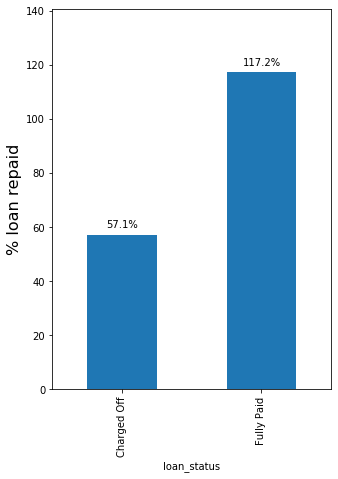

In [150]:
plt.figure(figsize=(5,7))
ax = (loan_data.groupby('loan_status').total_pymnt.sum() * 100 / loan_data.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan repaid', fontsize=16)
plt.margins(0.2, 0.2)
showLabels(ax)

The defaulters had paid only 57% of loan and the remaining 43% are not recovered!!...<br>
Where as around 17% profit is made from the fully paid customers...

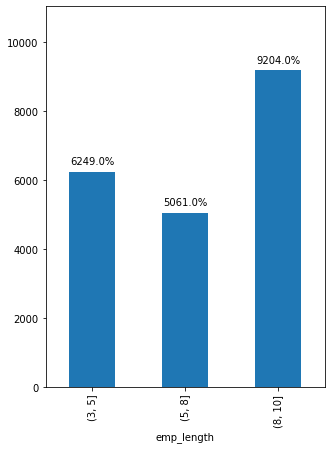

In [163]:
plt.figure(figsize=(5,7))
ax = loan_data.groupby('emp_length').loan_amnt.count().plot.bar()
showLabels(ax)
plt.show()

When the number of experiences are more the capacity of availing loan is high.

In [174]:
loan_data.groupby('emp_length')['loan_status'].describe()

,count,unique,top,freq
emp_length,,,,
"(3, 5]",6249,2,Fully Paid,5400
"(5, 8]",5061,2,Fully Paid,4335
"(8, 10]",9204,2,Fully Paid,7824


Customers with >8 years of experience are more likely to repay the loan faster...

In [177]:
loan_data.groupby('loan_status')['last_pymnt_d'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,4943,94,Oct-12,160
Fully Paid,30424,96,Mar-13,883


The charged-off customers are more in the year 2012 and the fully paid customers are more in 2013.

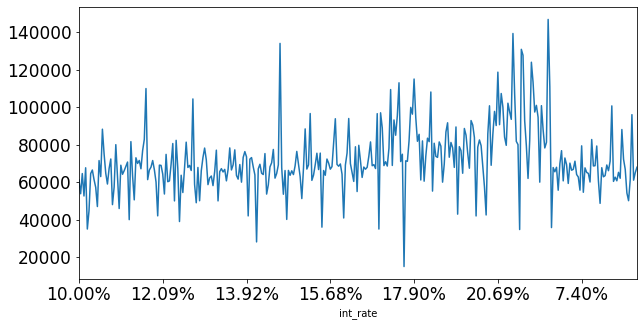

In [188]:
plt.figure(figsize=(10,5))
loan_data.groupby('int_rate').annual_inc.mean().plot(kind='line', fontsize=17)
plt.show()

Salary doesn't have significant impact on the loan interest rate.

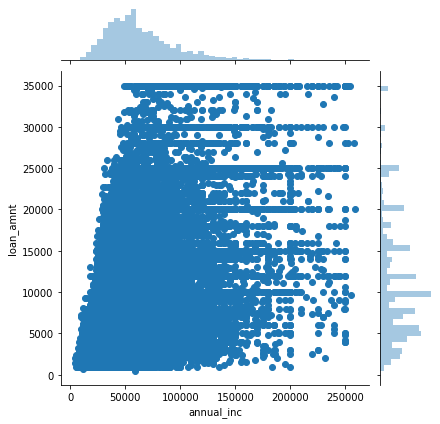

In [193]:
sns.jointplot('annual_inc', 'loan_amnt', loan_data.loc[loan_data['annual_inc']<260000])
plt.show()

Loan amount varies proportionately with Annual Income. While segments with annual income in mid range avails numerous middle value loan amount compared to high value loans segment.

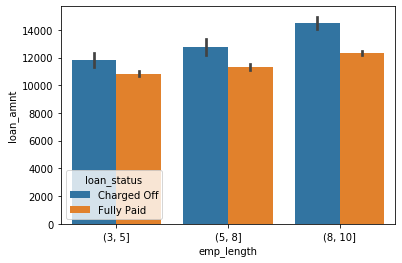

In [200]:
sns.barplot(x='emp_length', y='loan_amnt', hue="loan_status", data=loan_data, estimator=np.mean)

The amount of charged-off loans are more when the experience is >8 years.